# Beispiel mit Boston Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [3]:
np.random.seed(42)

x = dataset.data[:, 5:6] # Nur das fünfte Feature nutzen (als Beispiel)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [4]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2_own: 0.4584649934303068


In [5]:
def plot_regressor(regr, x_test, y_test):
    x1 = np.min(x) - 1
    x2 = np.max(x) + 1
    x_points = np.array([x1, x2])
    x_points = np.reshape(x_points, (-1, 1))
    y_pred = regr.predict(x_points)
    y1, y2 = y_pred
    plt.scatter(x_test, y_test, color = "blue")
    plt.plot((x1, x2), (y1, y2), color = "red")
    plt.show()

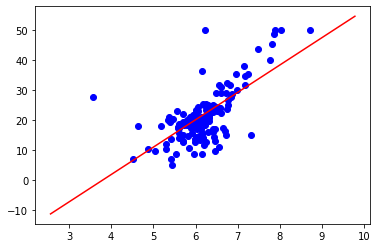

In [6]:
plot_regressor(regr, x_test, y_test)

In [9]:
def plot_residual(regr, x_train, y_train, x_test, y_test): 
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))   
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color = "blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color = "red")
    plt.hlines(y = 0, xmin = min_val, xmax = max_val)
    plt.legend(["Train", "Test"])
    plt.show()


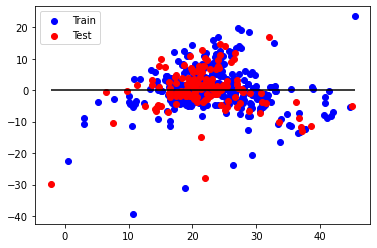

In [10]:
plot_residual(regr, x_train, y_train, x_test, y_test)